In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('./source/Queries.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB
None


Top queries  Clicks  Impressions     CTR  \
0                number guessing game python    5223        14578  35.83%   
1                        thecleverprogrammer    2809         3456  81.28%   
2           python projects with source code    2077        73380   2.83%   
3  classification report in machine learning    2012         4959  40.57%   
4                      the clever programmer    1931         2528  76.38%   

   Position  
0      1.61  
1      1.02  
2      5.94  
3      1.28  
4      1.09

In [47]:
# Fixed the data

df['CTR'] = df['CTR'].str.strip('%').astype(float) / 100
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   float64
 4   Position     1000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB
None


Top queries  Clicks  Impressions     CTR  \
0                number guessing game python    5223        14578  0.3583   
1                        thecleverprogrammer    2809         3456  0.8128   
2           python projects with source code    2077        73380  0.0283   
3  classification report in machine learning    2012         4959  0.4057   
4                      the clever programmer    1931         2528  0.7638   

   Position  
0      1.61  
1      1.02  
2      5.94  
3      1.28  
4      1.09

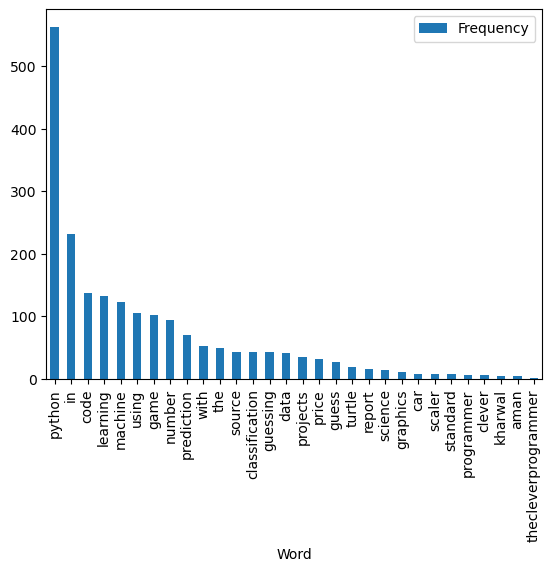

In [48]:
import re

def get_words(query):
    words = re.findall(r'\b[a-zA-Z]+\b', query.lower())
    return words


words_count = Counter()
for query in df['Top queries']:
    words_count.update(get_words(query))

df_words_freq = pd.DataFrame.from_dict(words_count, orient='index').reset_index()
df_words_freq.columns = ['Word', 'Frequency']

# Top 30 most common words in search queries
df_words_freq.head(30)\
        .sort_values(by='Frequency', ascending=False)\
        .plot(kind='bar', x='Word', y='Frequency')

plt.show()

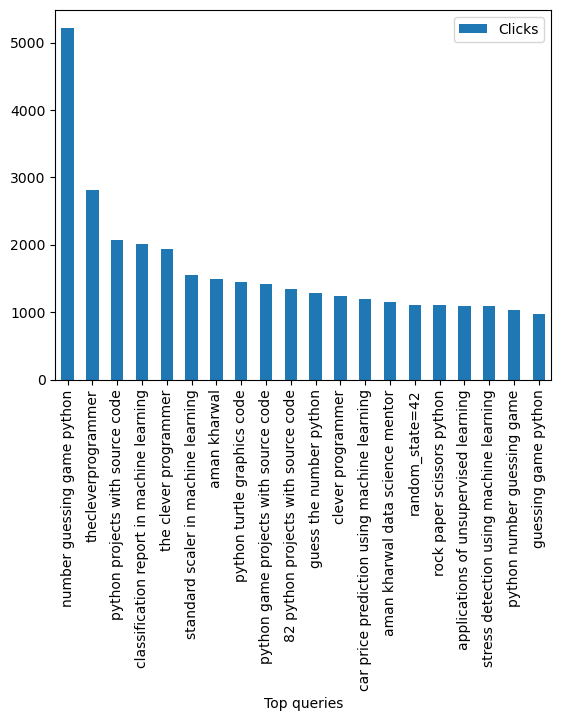

In [49]:
# Top queries based on its click

# print(df['Top queries'].nunique())

df.head(20)\
    .sort_values(by='Clicks', ascending=False)\
    .plot(kind='bar', x='Top queries', y='Clicks')

plt.show()

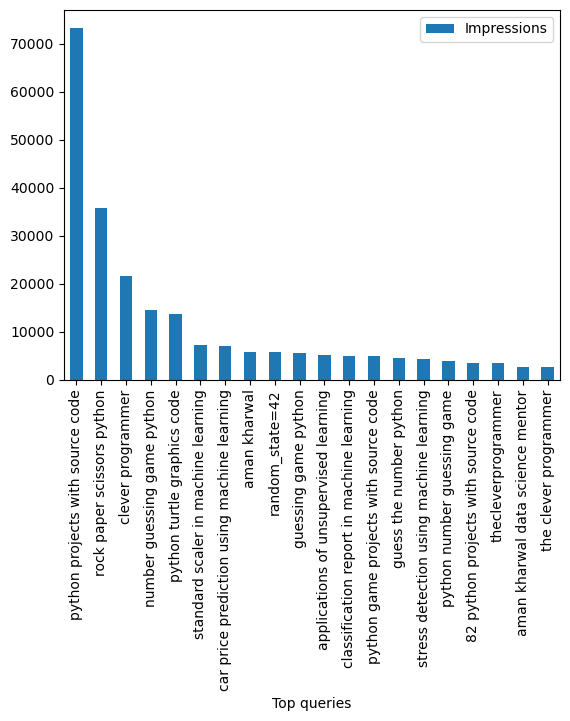

In [50]:
# Top queries based on its impressions

df.head(20)\
    .sort_values(by='Impressions', ascending=False)\
    .plot(kind='bar', x='Top queries', y='Impressions')

plt.show()

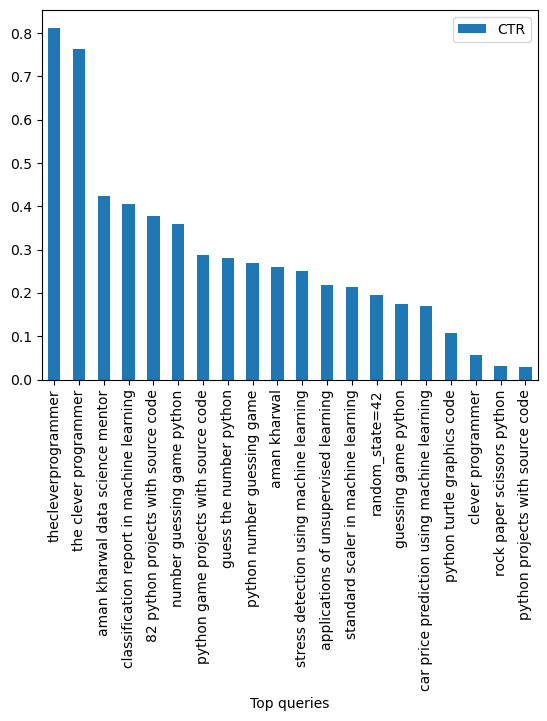

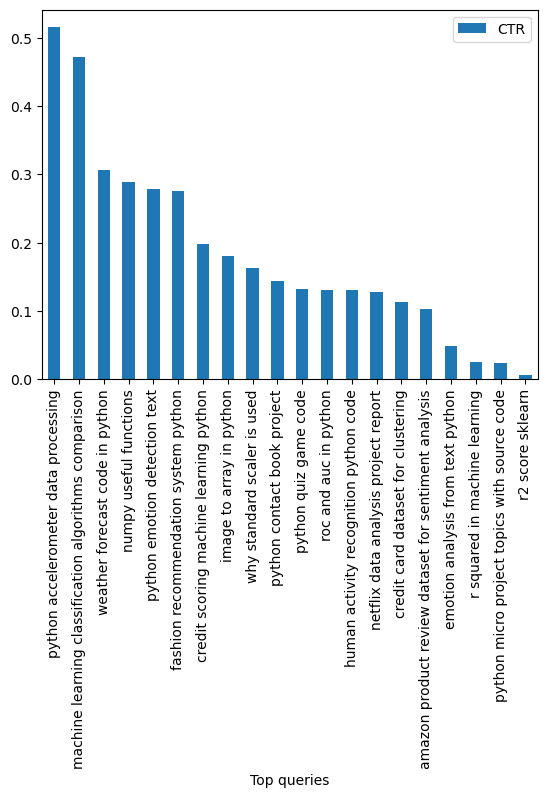

In [51]:
# Top and bottom queries based on its CTR

df.head(20)\
    .sort_values(by='CTR', ascending=False)\
    .plot(kind='bar', x='Top queries', y='CTR')

df.tail(20)\
    .sort_values(by='CTR', ascending=False)\
    .plot(kind='bar', x='Top queries', y='CTR')

plt.show()

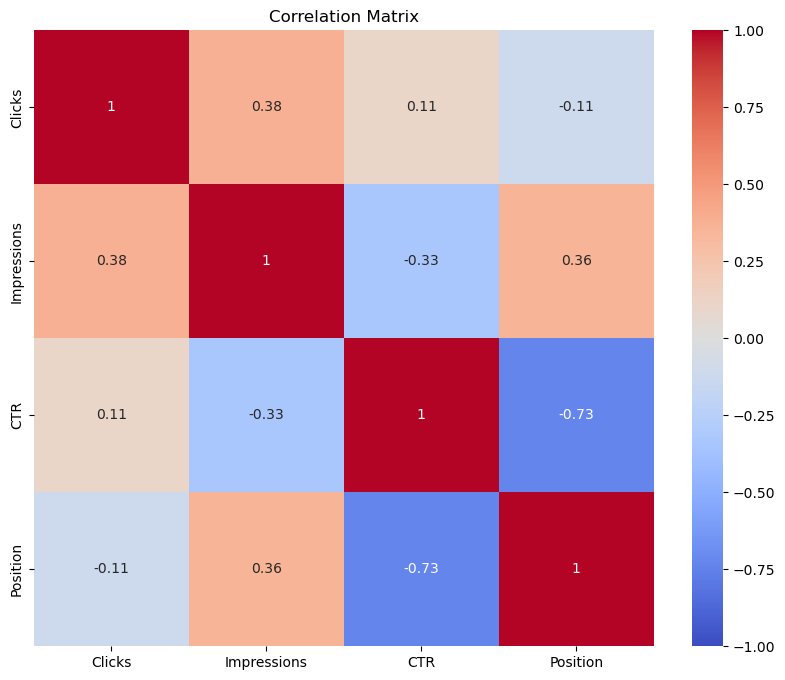

In [53]:
# Correlation matrix

corr_matrix = df[['Clicks', 'Impressions', 'CTR', 'Position']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Insight from this correlation:

- Clicks and Impressions are positively correlated, meaning more Impressions tend to lead to more Clicks.

- Clicks and CTR have a weak positive correlation, implying that more Clicks might slightly increase the Click-Through Rate.

- Clicks and Position are weakly negatively correlated, suggesting that higher ad or page Positions may result in fewer Clicks.

- Impressions and CTR are negatively correlated, indicating that higher Impressions tend to result in a lower Click-Through Rate.

- Impressions and Position are positively correlated, indicating that ads or pages in higher Positions receive more Impressions.

- CTR and Position have a strong negative correlation, meaning that higher Positions result in lower Click-Through Rates.

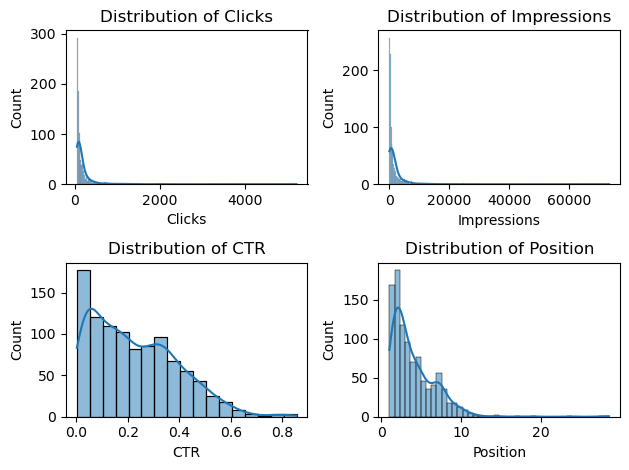

In [55]:
columns = ['Clicks', 'Impressions', 'CTR', 'Position']
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [59]:
# Prepare dataset
X = df[['Clicks', 'Impressions', 'CTR', 'Position']].values

In [69]:
# Machine learning using One-Class SVM

from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), OneClassSVM())
model.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('oneclasssvm', OneClassSVM())])

In [70]:
df_result = df.copy()

# Result
result = model.predict(X)

df_result['anomaly'] = result
df_result = df_result[df_result['anomaly'] == -1]
df_result.head()

Top queries  Clicks  Impressions     CTR  \
0                number guessing game python    5223        14578  0.3583   
1                        thecleverprogrammer    2809         3456  0.8128   
2           python projects with source code    2077        73380  0.0283   
3  classification report in machine learning    2012         4959  0.4057   
4                      the clever programmer    1931         2528  0.7638   

   Position  anomaly  
0      1.61       -1  
1      1.02       -1  
2      5.94       -1  
3      1.28       -1  
4      1.09       -1

NOTE:
The anomalies in our search query data are not just outliers. They are indicators of potential areas for growth, optimization, and strategic focus. These anomalies are reflecting emerging trends or areas of growing interest. Staying responsive to these trends will help in maintaining and growing the website’s relevance and user engagement.

In [67]:
# Alternative: ML using IsolationForest

from sklearn.ensemble import IsolationForest

model = IsolationForest()
model.fit(X)

IsolationForest()

In [68]:
df_result = df.copy()

# Result
result = model.predict(X)

df_result['anomaly'] = result
df_result = df_result[df_result['anomaly'] == -1]
df_result.head()

Top queries  Clicks  Impressions     CTR  \
0                number guessing game python    5223        14578  0.3583   
1                        thecleverprogrammer    2809         3456  0.8128   
2           python projects with source code    2077        73380  0.0283   
3  classification report in machine learning    2012         4959  0.4057   
4                      the clever programmer    1931         2528  0.7638   

   Position  anomaly  
0      1.61       -1  
1      1.02       -1  
2      5.94       -1  
3      1.28       -1  
4      1.09       -1